 # Funciones auxiliares en OpenCV-python
 Se listan a continuación algunas funciones comunes de OpenCV y otras que las complementan. En general, la implementación de OpenCV es más eficiente que las de otras librerías de python, por lo que se prefiere por ejemplo para el cálculo de transformaciones, histogramas, etc. Algunas de estas funciones están implementadas en pdifun.py

In [1]:
import numpy as np
import cv2 as cv
import pdifun
from matplotlib import pyplot as plt

print(cv.__version__)

3.4.0


In [2]:
img1=cv.imread("camino.tif",cv.IMREAD_GRAYSCALE)

# Visualización con Opencv
#cv.imshow("Titulo 1",img1)
#cv.waitKey(0)
#cv.destroyAllWindows()

Dependiendo el caso, matplotlib puede ser más práctico para mostrar diferentes imágenes y agregar elementos

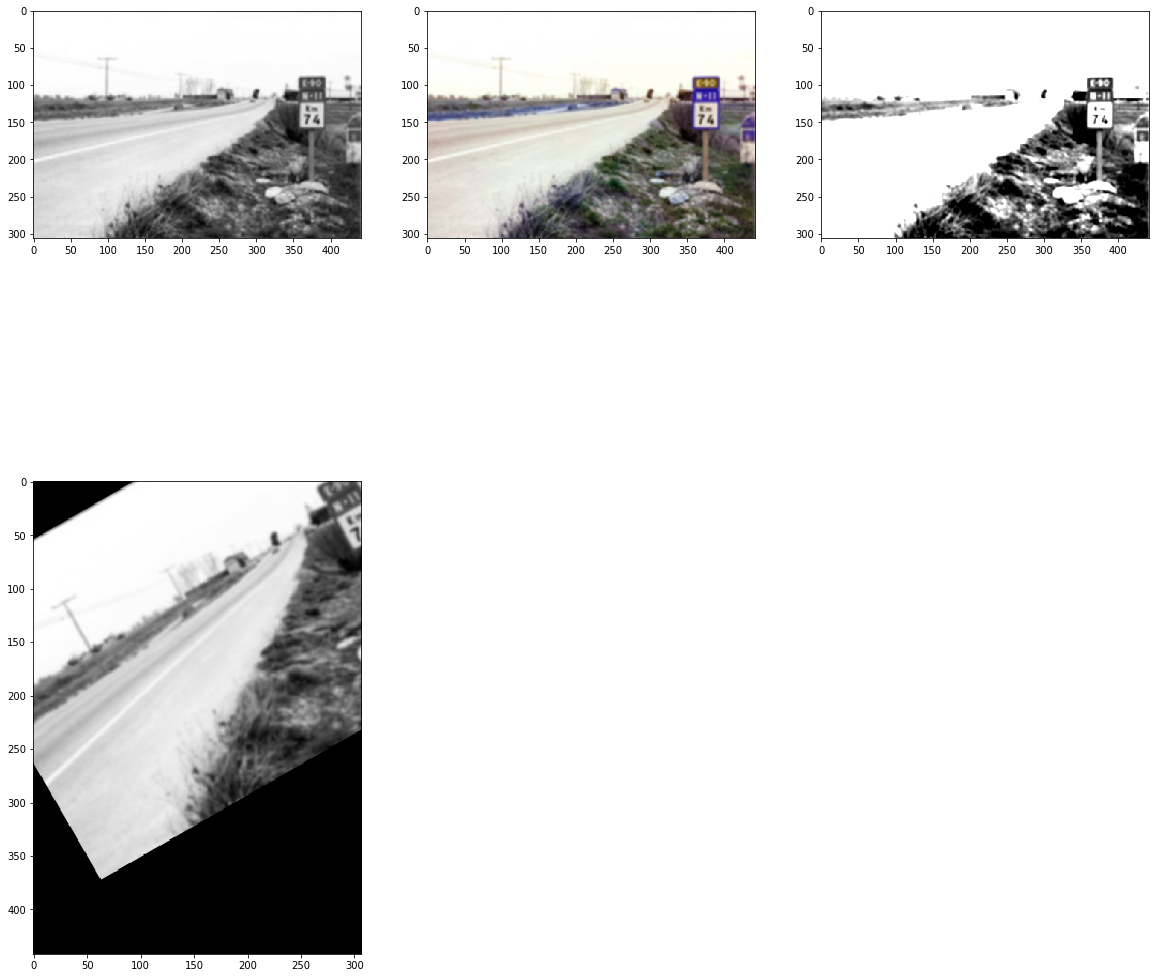

In [3]:
img2=cv.imread("camino.tif")

# Clamp: Ajustar a valores límite [50,150] 
img3=cv.min(cv.max(img1,50),150)

# Rotación
img4=pdifun.rotate(img1,30)


plt.figure(figsize=(20,20))
plt.subplot(2,3,1)
plt.imshow(img1,cmap='gray')
plt.subplot(2,3,2)
plt.imshow(img2)
plt.subplot(2,3,3)
plt.imshow(img3,cmap='gray')
plt.subplot(2,3,4)
plt.imshow(img4,cmap='gray')
plt.show()

La imagen es un ndarray de numpy, por tanto podemos usar muchas funciones simples de este módulo

In [4]:
print(img1)
print("(alto,ancho,canales)=%s" %str(img2.shape))
print(img2.dtype)

print("valor medio %.3f, mínimo %d, máximo %d" %(np.mean(img1),np.min(img1),np.max(img1)))


[[208 211 219 ...  77  77  77]
 [231 232 236 ... 145 145 145]
 [246 247 248 ... 206 206 206]
 ...
 [213 213 214 ...  83 134 195]
 [213 213 214 ...  85 135 195]
 [213 213 213 ...  86 135 195]]
(alto,ancho,canales)=(307, 442, 3)
uint8
valor medio 183.680, mínimo 1, máximo 255


## Perfil de intensidad e histogramas
Graficamos el perfil de intensidad de una linea y el histograma de la imágen

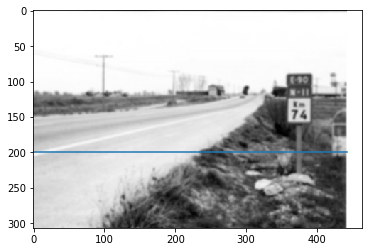

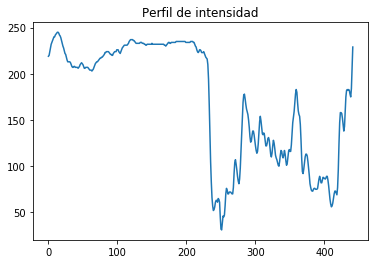

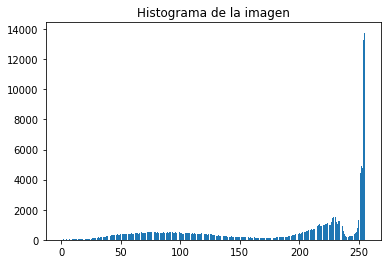

In [5]:
line=200
plt.figure()
plt.imshow(img1,cmap='gray')
plt.plot([0,img1.shape[1]],[line,line])

plt.figure()
plt.plot(img1[line,:])
plt.title("Perfil de intensidad")

plt.figure()
#cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])
hist=cv.calcHist([img1], [0], None, [256], [0,256])
plt.bar(range(256),np.squeeze(hist))
plt.title("Histograma de la imagen")

plt.show()

## Transformada Discreta de Fourier (DFT)

(307, 442)


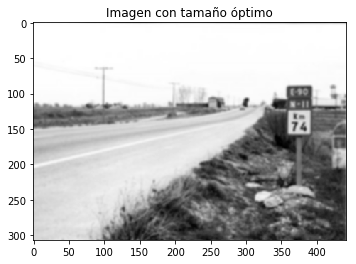

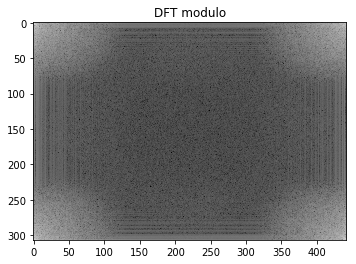

In [6]:
# Tamaño óptimo de la imágen para el mejor rendimiento de la DFT. 
# Si la velocidad es un requerimiento, se agregan ceros (zero-padding) a la imagen. 
#img1=pdifun.optimalDFTImg(img1)
print(img1.shape)
plt.figure()
plt.imshow(img1,cmap='gray')
plt.title("Imagen con tamaño óptimo")

# componente real e imaginaria en diferentes canales
imgf=cv.dft(np.float32(img1),flags=cv.DFT_COMPLEX_OUTPUT) 
modulo = 20*np.log(cv.magnitude(imgf[:,:,0],imgf[:,:,1]))
plt.figure()
plt.imshow(modulo,cmap='gray')
plt.title("DFT modulo")
plt.show()

Para facilitar la visualización centramos el módulo en la imagen. La función fftshift del módulo numpy.fft invierte los cuadrantes de la transformada, de forma tal que el punto (0,0) queda en la posición (alto/2,ancho/2)

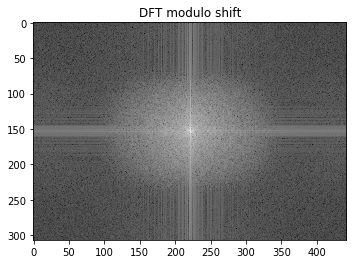

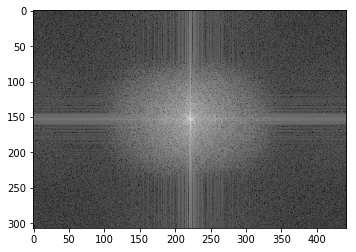

In [7]:
moduloshift = np.fft.fftshift(modulo) 
plt.figure()                    
plt.imshow(moduloshift,cmap='gray')
plt.title("DFT modulo shift")
plt.show()


# esto está implementado en pdifun
pdifun.spectrum(img1)


## Filtrado
### Filtro en dominio espacial

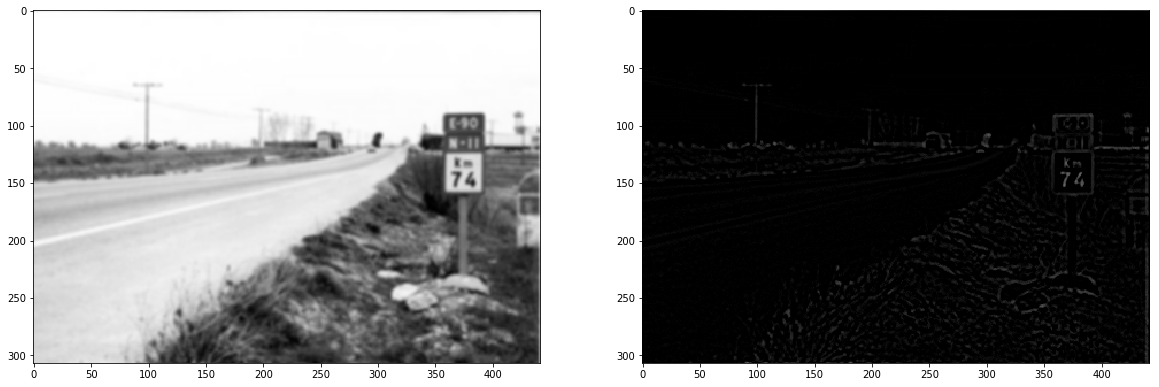

In [8]:
kernel=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]]) # laplaciano
img5=cv.filter2D(img1,-1,kernel) #-1 mantiene la profundidad original de img1

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img1,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img5,cmap='gray')
plt.show()

### Filtro en dominio frecuencial

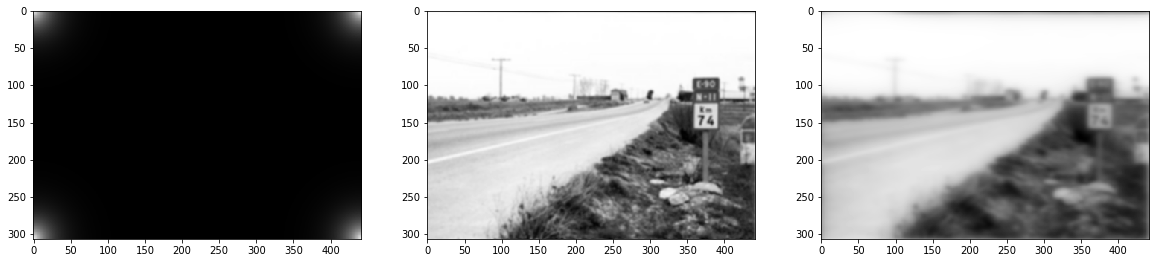

In [9]:
filterG=pdifun.filterGaussian(img1.shape[0],img1.shape[1],.01)

img6=pdifun.filterImg(img1,filterG)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(filterG,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(img1,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(img6,cmap='gray')

plt.show()
